# DATA MINING FROM TWITTER
THIS MINES CHARITY RELATED TWEETS FROM TWITTER TO HAVE AN IDEA ON WHAT IS GOING ON IN THE WORLD ON CHARITY

In [1]:
import json
import os


In [ ]:
#Import the necessary methods from tweepy library
import json
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream


#Variables that contains the user credentials to access Twitter API 
access_token = "1215249030-tDjldPYG56BHJmwTOJ61hcn5kazSHbfr40dgq3Z"
access_token_secret = "nBXvpxzI8ITNRbRB1KDtAoIWfZ0waqIXAPG5diYsiZfos"
consumer_key = "2HOYrFcWkfBnkRFzHPbbrfSxp"
consumer_secret = "RoQ0Dj5s7EHdfex2pgwdedzLxrV5lVukN5gtOdvY5kFYdUVLWQ"

f = open('charity.txt', 'w')
#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        try:
#writes the printed data in a json file
            with open('twittee_data_all11.json','a') as f:
                f.write(json.dumps(data))
                #print(data)
                return True
        except BaseException as e:
            print("Error on_data:" % str(e))
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authentication and the connection to the Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #keywords for the streamer to listen to
    stream.filter(track=['charity','charity volunteer','charity work','community work','school support','non-profit organisation','helping the needy','school charity','free school','give donation','school fundraising','fundraising for schools','volunteering','charity for schools','educational empowerment','education empowerment','skill acquisition','voluntary contribution','volunteer'])


# DATA 1

In [141]:
#APPEND TWEET DATA TO AN ARRAY FOR PROPER REPRESENTATION
import json
path='C:\\Users\\Leo-SJ\\Desktop\\DATA VALIDATION\\CODE\\'
tweets=[]
t_file=open(path+'twitter_data44.json','r')
for line in t_file:
    try:
        t_load=json.loads(line)  #.decode('utf-8')
        tweets.append(t_load)
    except:
        continue        

In [135]:
tweets[1] #ALL INFORMATION FROM ONE TWEET

{'created_at': 'Wed Oct 24 06:44:35 +0000 2018',
 'id': 1054986996169486337,
 'id_str': '1054986996169486337',
 'text': '@KeepMeSoberToo @AlcoResearchUK @AlcoholConcern Its also about working collectively with the ither trustees, so bei… https://t.co/yIvujiQBfK',
 'display_text_range': [48, 140],
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': True,
 'in_reply_to_status_id': 1053050619064475648,
 'in_reply_to_status_id_str': '1053050619064475648',
 'in_reply_to_user_id': 1036187086469165056,
 'in_reply_to_user_id_str': '1036187086469165056',
 'in_reply_to_screen_name': 'KeepMeSoberToo',
 'user': {'id': 197741879,
  'id_str': '197741879',
  'name': 'Richard Piper',
  'screen_name': 'RichardCPiper',
  'location': 'St Albans',
  'url': None,
  'description': 'Charity leader ambitious for faster social change. CEO of AlcoholConcern/ AlcoholResearchUK. Views own. RT not endorsement.',
  'translator_type': 'none',
  'protected'

In [111]:
#CREATE AN EMPTY DATFRAME NAMED 't'
import pandas as pd
t=pd.DataFrame()

In [146]:
#MAP ALL TWEET TEXT, LANGUAGE, USER'S NAME, TIME TWEET WAS CREATED AND LOCATION OF THE USER INTO THE DATA FRAME 't'
t['text'] = list(map(lambda tweet: tweet['text'], tweets))
# t['text_full'] = list(map(lambda tweet: tweet['extended_tweet']['full_text'] if tweet['extended_tweet'] != None else None, tweets))
t['lang'] = list(map(lambda tweet: tweet['lang'], tweets))
t['user'] = list(map(lambda tweet: tweet['user']['name'], tweets))
t['created_at'] = list(map(lambda tweet: tweet['created_at'], tweets))
t['country'] = list(map(lambda tweet: tweet['user']['location'], tweets))
# t['country'] = map(lambda tweet: t['user']['location'] if tweet['user'] != None else None, tweets)

In [113]:
t.columns

Index(['text', 'lang', 'user', 'created_at', 'country'], dtype='object')

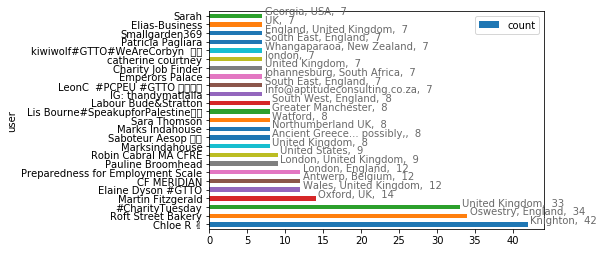

In [151]:
# PLOT THE FREQUENCY OF THE AMOUNT OF TWEETS HAVING THOSE KEYWORDS FOR THAT DAY
# filterr=t.groupby(['user','country']).count()[['text']]
#GROUP BY THE USERS AND COUNT THE AMOUNT OF TIMES THEY TWEETED THE KEYWORDS
filterr=t.groupby(['user','country']).size().reset_index(name='count')
# filterr=t.groupby('user').transform('count')


filter1=filterr.sort_values('count',ascending=False).head(25)[['user','country','count']]
# filter1['count']=filter1['count'].astype(float)

filterr2=filter1.plot.barh(x='user',y='count')


for i,j in zip(filterr2.patches,filter1['country']):
    filterr2.text(i.get_width()+.3,i.get_y()+.38,j+',  '+str(round((i.get_width()),2)),color='dimgrey')

# filter1

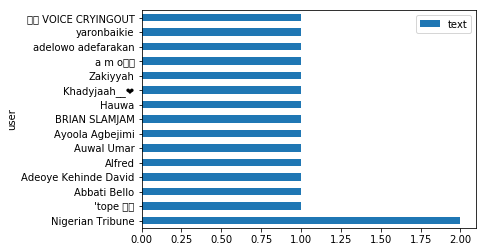

In [150]:
#FILTER DATA FOR NIGERIA ONLY
filterr=t[t.country=='Nigeria'].groupby('user').count()[['text']]
# filterr=t.groupby('user').count()[['text']]
# filt=t.groupby(['user','country']).count()[['text']]
# # filterr=DataFrame(filterr)
filterr2=filterr.sort_values('text',ascending=False).plot.barh()
# patch_data=[]
# # for i in filterr2.patches:
# #     filterr2.text(i.get_width()+.3,i.get_y()+.38,str(filt['country']))

# filterr

# DATA 2

In [129]:
#APPEND TWEET DATA TO AN ARRAY FOR PROPER REPRESENTATION
import json
path='C:\\Users\\Leo-SJ\\Desktop\\DATA VALIDATION\\CODE\\'
tweets1=[]
t_file=open(path+'twittee_data_all11.json','r')
for line in t_file:
    try:
        t_load=json.loads(line)  #.decode('utf-8')
        tweets1.append(t_load)
    except:
        continue

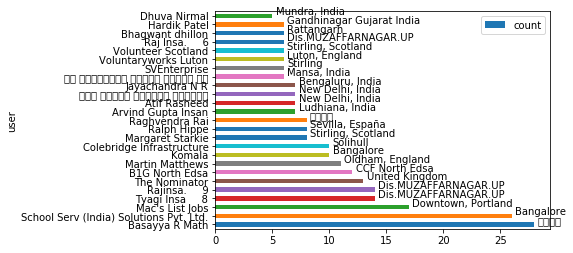

In [130]:
import pandas as pd
t1=pd.DataFrame()

#MAP ALL TWEET TEXT, LANGUAGE, USER'S NAME, TIME TWEET WAS CREATED AND LOCATION OF THE USER INTO THE DATA FRAME 't'
t1['text'] = list(map(lambda tweet: tweet['text'], tweets1))
# t['text_full'] = list(map(lambda tweet: tweet['extended_tweet']['full_text'] if tweet['extended_tweet'] != None else None, tweets))
t1['lang'] = list(map(lambda tweet: tweet['lang'], tweets1))
t1['user'] = list(map(lambda tweet: tweet['user']['name'], tweets1))
t1['created_at'] = list(map(lambda tweet: tweet['created_at'], tweets1))
t1['country'] = list(map(lambda tweet: tweet['user']['location'], tweets1))
# t['country'] = map(lambda tweet: t['user']['location'] if tweet['user'] != None else None, tweets)


# PLOT THE FREQUENCY OF THE AMOUNT OF TWEETS HAVING THOSE KEYWORDS FOR THAT DAY

#GROUP BY THE USERS AND COUNT THE AMOUNT OF TIMES THEY TWEETED THE KEYWORD
filterr=t1.groupby(['user','country']).size().reset_index(name='count')
# filterr=t.groupby('user').transform('count')


filter1=filterr.sort_values('count',ascending=False).head(25)[['user','country','count']]
filter1['count']=filter1['count'].astype(float)

filterr2=filter1.plot.barh(x='user',y='count')


for i,j in zip(filterr2.patches,filter1['country']):
    filterr2.text(i.get_width()+.3,i.get_y()+.38,j)

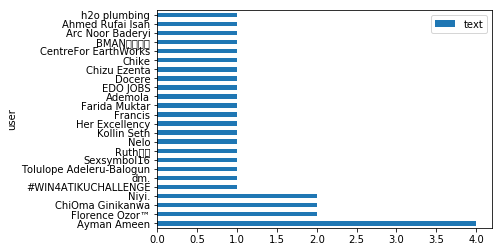

In [131]:
#FILTER DATA FOR NIGERIA ONLY
filterr=t1[t1.country=='Nigeria'].groupby('user').count()[['text']]

filterr2=filterr.sort_values('text',ascending=False).plot.barh()


# DATA 3

In [132]:
#APPEND TWEET DATA TO AN ARRAY FOR PROPER REPRESENTATION
import json
path='C:\\Users\\Leo-SJ\\Desktop\\DATA VALIDATION\\CODE\\'
tweets2=[]
t_file=open(path+'d.json','r')
for line in t_file:
    try:
        t_load=json.loads(line)  #.decode('utf-8')
        tweets2.append(t_load)
    except:
        continue

In [133]:
len(tweets2)

85

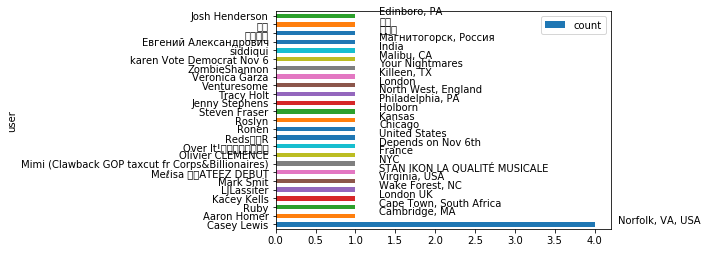

In [142]:
import pandas as pd
t2=pd.DataFrame()

#MAP ALL TWEET TEXT, LANGUAGE, USER'S NAME, TIME TWEET WAS CREATED AND LOCATION OF THE USER INTO THE DATA FRAME 't'
t2['text'] = list(map(lambda tweet: tweet['text'], tweets2))
# t['text_full'] = list(map(lambda tweet: tweet['extended_tweet']['full_text'] if tweet['extended_tweet'] != None else None, tweets))
t2['lang'] = list(map(lambda tweet: tweet['lang'], tweets2))
t2['user'] = list(map(lambda tweet: tweet['user']['name'], tweets2))
t2['created_at'] = list(map(lambda tweet: tweet['created_at'], tweets2))
t2['country'] = list(map(lambda tweet: tweet['user']['location'], tweets2))
# t['country'] = map(lambda tweet: t['user']['location'] if tweet['user'] != None else None, tweets)


# PLOT THE FREQUENCY OF THE AMOUNT OF TWEETS HAVING THOSE KEYWORDS FOR THAT DAY

#GROUP BY THE USERS AND COUNT THE AMOUNT OF TIMES THEY TWEETED THE KEYWORD
filterr=t2.groupby(['user','country']).size().reset_index(name='count')
# filterr=t.groupby('user').transform('count')


filter1=filterr.sort_values('count',ascending=False).head(25)[['user','country','count']]
filter1['count']=filter1['count'].astype(float)

filterr2=filter1.plot.barh(x='user',y='count')


for i,j in zip(filterr2.patches,filter1['country']):
    filterr2.text(i.get_width()+.3,i.get_y()+.38,j)

In [69]:
len(filterr.text.values)

11510

In [11]:
t.groupby('user').first().head(10)

,text,lang,created_at,country
user,,,,
!KRISHNA!,RT @NarsinghDel: @DXPAssociation @ArvindKejriw...,en,Thu Oct 25 12:01:24 +0000 2018,"New Delhi, India"
#247running,RT @JojosarRuns: This is a great charity (disc...,en,Thu Oct 25 10:28:00 +0000 2018,UK & Worldwide
#30thOctober,RT @aahmad_sabo: Kano state government mobiliz...,en,Thu Oct 25 11:28:27 +0000 2018,"Zaria,kaduna state."
#America VOTE BLUE #defeathate,The email in this chain is stunning. I wonder...,en,Thu Oct 25 12:07:22 +0000 2018,"Illinois, USA"
#Are_you_there #Shoot_out owns my ass,@chimchim_sali95 @parkjmfairy Have you seen th...,en,Thu Oct 25 11:35:55 +0000 2018,"Southern California, USA"
#BILKUL_FREE_FLOW,"Excited , Please listen , Our PM Mentioning a...",en,Thu Oct 25 11:20:13 +0000 2018,"Bengaluru, India"
#BadHindu #SaveSabrimala Doctor Doctor!,RT @girishalva: Bhaskar is a nationalist and h...,en,Thu Oct 25 09:14:25 +0000 2018,"Bengaluru, India"
#BeTeamWomen,"#wokeyoungwomen♀️ panelist, @NazzyAmin, became...",en,Thu Oct 25 11:43:47 +0000 2018,None
#BeatWKU,RT @chiapanther: @FIUPanthersFan @MIASuperFan ...,en,Thu Oct 25 11:11:40 +0000 2018,"Miami, FL"


In [19]:
t.groupby('lang').first().head(10)

,text,user,created_at,country
lang,,,,
ar,RT @mohameddolah: البرنامج ده هدفه نبيل جدا بي...,شيماء,Thu Oct 25 08:31:48 +0000 2018,None
ca,America!,TaylorLT,Thu Oct 25 11:00:53 +0000 2018,United States
cy,Buddsoddi mewn Gwirfoddolwyr - hyfforddiant as...,Volunteering Wales,Thu Oct 25 09:33:25 +0000 2018,Wales
de,Guest Relation / Community Manager (m/w/d) - E...,Jobs Erlangen,Thu Oct 25 09:42:43 +0000 2018,Erlangen
en,RT @HaliborangeUK: FLW &amp; RT to #WIN this f...,🐝☀️Kate 🌈🍦,Thu Oct 25 08:19:46 +0000 2018,Liverpool
es,tenten!!!!!!!!!,jace m,Thu Oct 25 08:33:23 +0000 2018,China // Seoul
et,#VoteBlueToEndThisNightmare Said no one sane.,America First,Thu Oct 25 09:20:23 +0000 2018,"Chicago, Illinois"
fi,European Volunteer Centre CEV:in konferenssi k...,Kansalaisareena ry,Thu Oct 25 09:16:03 +0000 2018,None
fr,HELLO TWITTER I NEED YOUR HELP\nJe pars faire ...,La Street,Thu Oct 25 08:27:42 +0000 2018,"Melbourne, Victoria"


In [27]:
t.groupby('country').first().head(10)

,text,lang,user,created_at
country,,,,
,"Great opportunity, great charity and an amazin...",en,Stephen Gray,Thu Oct 25 10:04:58 +0000 2018
,RT @LouDobbs: Why are Minnesotans ignoring hug...,en,Kathy,Thu Oct 25 09:59:11 +0000 2018
🔱महादेव के भक्ति मै,RT @ajaykumar2697: This cap was part of an #IN...,en,महादेव का दीवाना🇮🇳,Thu Oct 25 09:01:08 +0000 2018
#NeverINC #Yogi2024,"RT @aasare1: Wasnt keen but kid was,so https:/...",en,Sunil Mathews,Thu Oct 25 10:28:54 +0000 2018
33,"RT @qwertee: ""Hogwarts School"" for just 12hr m...",en,Matthieu,Thu Oct 25 09:02:32 +0000 2018
"Air Force Station,JODHPUR","RT @narendramodi: When we serve, we learn. \n\...",en,Deepak Pandey,Thu Oct 25 12:35:16 +0000 2018
Australia,RT @michelle_munt: #Volunteering and turning d...,en,Angela B Mortimer,Thu Oct 25 08:41:03 +0000 2018
"Brierfield, Nelson,Clowbridge",RT @PendlesideHosp: Have you ever considered v...,en,jeff heyworth,Thu Oct 25 08:58:01 +0000 2018
Ethos 💫,RT @Amy_Siskind: A now an activist has been po...,en,Carolyn 🌊RESIST🌊,Thu Oct 25 12:41:11 +0000 2018


In [103]:
#SAVE DATAFRAME 't' TO EXCEL FOR FURTHER ANALYSIS ON TWEETS
t
# go=t[t['country'].str.contains("Nigeria","Lagos",na=False)]
# go.to_excel('textt2.xlsx')
t.to_excel('textt3.xlsx')

In [97]:
len(tweets)
type(type(tweets[1]['user']))
keys=[]
for key, value in sorted(tweets[1].items()):
    keys.append(key)
for i in keys:
    print(str(i)+"====="+str(tweets[1][i]))

contributors=====None
coordinates=====None
created_at=====Thu Oct 25 08:19:46 +0000 2018
display_text_range=====[76, 140]
entities====={'user_mentions': [{'indices': [0, 11], 'screen_name': 'oOoOoLaLaa', 'name': 'belinda esteen', 'id': 162496339, 'id_str': '162496339'}, {'indices': [12, 21], 'screen_name': 'vkrunich', 'name': 'Vanessa K', 'id': 1711255604, 'id_str': '1711255604'}, {'indices': [22, 33], 'screen_name': 'SWjoeperez', 'name': 'Joe N Perez', 'id': 3108653216, 'id_str': '3108653216'}, {'indices': [34, 42], 'screen_name': 'TMobile', 'name': 'T-Mobile', 'id': 17338082, 'id_str': '17338082'}, {'indices': [43, 58], 'screen_name': 'MetroByTMobile', 'name': 'Metro by T-Mobile', 'id': 103074428, 'id_str': '103074428'}, {'indices': [59, 75], 'screen_name': 'HeatherAtwoodSW', 'name': 'Heather Atwood', 'id': 2632942210, 'id_str': '2632942210'}], 'urls': [{'expanded_url': 'https://twitter.com/i/web/status/1055373340657897472', 'display_url': 'twitter.com/i/web/status/1…', 'url': 'https

In [8]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import operator
import itertools
operator.attrgetter('author.screen_name')

operator.attrgetter('author.screen_name')

In [72]:
tweets[1]['text']

'@oOoOoLaLaa @vkrunich @SWjoeperez @TMobile @MetroByTMobile @HeatherAtwoodSW We had such a blast volunteering! We sp… https://t.co/9GkZqdYctw'

In [91]:
len(tweets)
keys=[]
for key, value in sorted(tweets[1].items()):
    print(key)
    keys.append(key)

# for key, value in sorted(tweets[1].items()) :
#     if type(tweets[1][key])==dict:
#         print(key)

contributors
coordinates
created_at
display_text_range
entities
extended_tweet
favorite_count
favorited
filter_level
geo
id
id_str
in_reply_to_screen_name
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
is_quote_status
lang
place
quote_count
reply_count
retweet_count
retweeted
source
text
timestamp_ms
truncated
user


In [22]:
 for i in range(len(tweets)):
        find=tweets[i]['user']['location']
        if "Nigeria" in find:
            print(find)

TypeError: argument of type 'NoneType' is not iterable